# Face Shape Classifier for Glasses Recommendation

With this project, I will attempt to address the challenge by developing a Best eye fit recommendation system that identifies the user’s face shape and recommends the most flattering glasses. My approach will be to first build a facial classifier that will determine whether the user’s face is long, round, oval, heart- or square-shaped. Based on the classification, the model will recommend appealingglasses. 

In [24]:
#import library 
import os 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Date visualisation

In [8]:
def list_files(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        subindent = ' ' * 4 * (level + 1)
        x=0
        for f in files:
            x=x+1
        if (x!=0):
            print('{}{}/'.format(indent, os.path.basename(root)),x)

In [40]:
list_files("C:/Users/msi/Desktop/katyos/code organiser/FaceShape Dataset")

    0/ 1000
    1/ 1000
    2/ 1000
    3/ 1000
    4/ 1000


In [41]:
image_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/msi/Desktop/katyos/code organiser/FaceShape Dataset",
    seed=123)

Found 5000 files belonging to 5 classes.


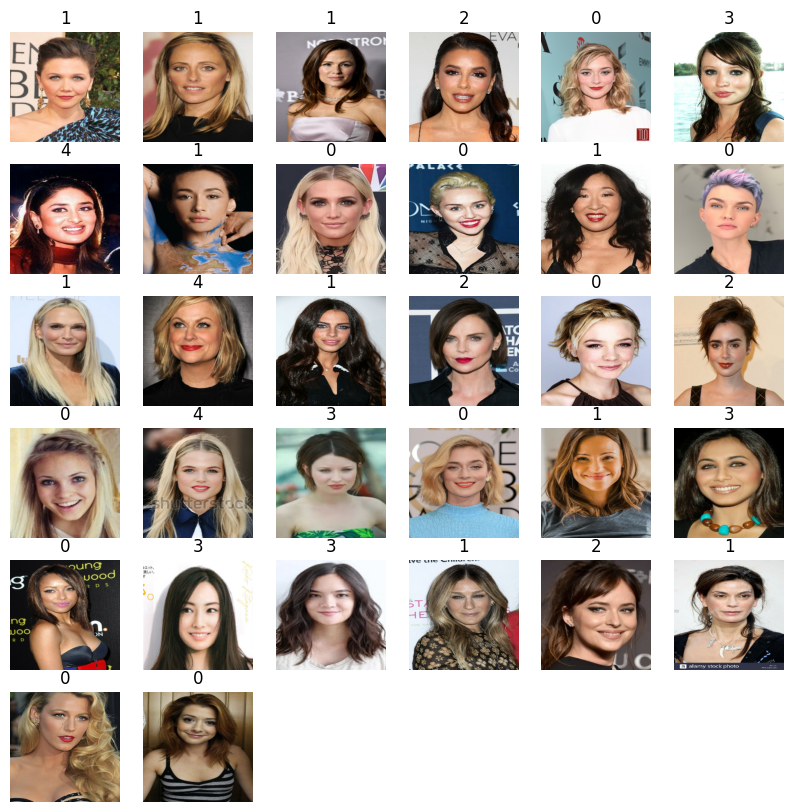

In [21]:
plt.figure(figsize=(10, 10))
class_names = image_data.class_names
for images, labels in image_data.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

As you can observe that the face shape do differ in structure in various ways:

1.The heart-shaped face is characterized by wider cheekbones that tapers down to a narrow chin.

2.The long face is, well, long and very narrow.

3.The oval face is similar to the long face but fuller than the long face.

4.The round face is distinct, it's a much shorter and wider shape.

5.The square-shape face is charcterized by a strong jaw.

In [22]:
image_data.class_names

['0', '1', '2', '3', '4']

In [28]:
# Read the CSV file
df = pd.read_csv('data.csv',encoding='latin-1')

# Print the contents of the DataFrame
df

,ClassId,Name
0,0,forme de visage coeur
1,1,forme de visage oblong
2,2,forme de visage ovale
3,3,forme de visage rond
4,4,forme de visage carré


# processing Images

An extraordinary amount of work has been done around computer vision such that a library called  dlib to extract features of human face.

### feature Extraction

Below is a map of facial feature map which generates 81 unique points.

In [33]:
%%html
<img src="img/dlib 81.jpg">

to detect key facial features i will use dlib's 81 point facial landmark detector in order to detect 81 key points on faces ,i have choose to work with this predictor because it provides 13 additional landmarks that delimeate the forehead 

### Processing

in order to process over 5000 images,i developed a function that will processe through the folders and calculate distances,ratios and angles:

In [37]:
%%html
<img src="img/distance and angles.png">


Dlib 81 library was used to automatically place landmarks on images for calculating distances,ratios and angles.
* Landmarks numbered 2 and 14 were used for getting the distance D1 between the left and right ear.
* Landmarks numbered 75 and 79 were used for getting the distance D2 between the left and right forehead.
* Landmarks numbered 69 and 72 for the leftand right-forehead and 8 for the chin. Theselandmarks were used for getting the distance D3 from the hairline to the chin.
* Landmarks numbered 8 and 12 were used for getting the distance D4 of the jawline.
* Landmarks numbered 4 and 12 were used for getting the distance D5.
* Landmarks numbered 6 and 10 were used for getting the distance D6.
* Landmarks numbered 7 and 9 were used for getting the distance D7.


### The different ratios used for calculation are defined as follows:
* Ratio 1 (R1) = D2 / D1.
* Ratio 2 (R2) = D1 / D3.
* Ratio 3 (R2) = D2 / D3.
* Ratio 4 (R2) = D1 / D5.
* Ratio 5 (R2) = D6 / D5.
* Ratio 6 (R2) = D4 / D6.
* Ratio 7 (R2) = D6 / D1.
* Ratio 8 (R2) = D5 / D2.
* Ratio 9 (R2) = D4 / D5.
* Ratio 10 (R2) = D7 / D6.


### The different angles used for calculation are defined as follows:
* Angle 1 between the line from hairline to chin and line from chin to landmark numbered 10.
* Angle 2 between the line from hairline tochin and line from chin to landmark numbered12.
* Angle 3 between the line from landmark numbered 2 to landmark numbered 14 and line from landmark numbered 14 to landmark numbered 12.

## Extract features and store them in extracted.csv file

In [ ]:
def extract_features(dataset_path, csv_file_path):
    # Initialize the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_81_facee_landmarks.dat")

    # Open the CSV file for writing
    with open(csv_file_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)

        # Write the header row for the CSV file
        csv_writer.writerow(['Classes', 'Ratio R2', 'Jawline Width D5', 'Ratio R3', 'angle A1','Forehead width D2','face length D3','chin_width D6','angle A2',"Ratio R1",'Ratio R8','Ratio R7','Ratio R3', 'Ratio R4','Ratio R5','Ratio R6','Ratio R9','Ratio R10','cheekbone width D1','jawline length D4','chin shape D7' ,'angle A3'])

        # Iterate over all image files in the dataset directory
        for subdir, dirs, files in os.walk(dataset_path):
            for file in files:
                # Check if the file is an image
                if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                    # Load the image file
                    image_path = os.path.join(subdir, file)
                    frame = cv2.imread(image_path)

                    # Convert the image to grayscale
                    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                    # Detect faces in the image
                    faces = detector(gray)

                    # Loop over each face detected
                    for face in faces:
                        # Detect landmarks
                        landmarks = predictor(gray, face)

                        # Extract feature values
                        

                        x_top=landmarks.part(71).x
                        Y_top=landmarks.part(71).y
                        cv2.circle(frame,(x_top,Y_top),3,(0,255,225),-1)
                        x_bottom=landmarks.part(8).x
                        Y_bottom=landmarks.part(8).y
                        cv2.circle(frame,(x_bottom,Y_bottom),3,(0,255,225),-1)
                        cv2.putText(frame, "D3", (int((x_top+x_bottom)/2), Y_top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                        height_face = math.sqrt((x_bottom - x_top)**2 + (Y_bottom - Y_top)**2)
                        height_face = round(height_face, 2)
                # Draw a line D3
                        cv2.line(frame, (x_top, Y_top), (x_bottom, Y_bottom), (0, 0, 255), 1)





                # extract forhead landmarks        
                        x_right_forehead=landmarks.part(75).x
                        Y_right_forehead=landmarks.part(75).y
                        cv2.circle(frame,(x_right_forehead,Y_right_forehead),3,(0,255,225),-1)
                        x_left_forehead=landmarks.part(79).x
                        Y_left_forehead=landmarks.part(79).y
                        cv2.circle(frame,(x_left_forehead,Y_left_forehead),3,(0,255,225),-1)
                        # Draw line D1 for forehead width
                        cv2.line(frame, (x_left_forehead, Y_left_forehead), (x_right_forehead, Y_right_forehead), (0, 0, 255), 1)
                # Calculate forehead width
                        forehead_width = math.sqrt((x_right_forehead - x_left_forehead)**2 + (Y_right_forehead - Y_left_forehead)**2)
                        forehead_width = round(forehead_width, 2)


                        cv2.putText(frame, "D2", (x_left_forehead - 50, int((Y_right_forehead+Y_left_forehead)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)





                # extract jaw landmarks        
                        x_right_jaw=landmarks.part(12).x
                        y_right_jaw=landmarks.part(12).y
                        cv2.circle(frame,(x_right_jaw,y_right_jaw),3,(0,255,225),-1)
                        x_left_jaw=landmarks.part(4).x
                        y_left_jaw=landmarks.part(4).y
                        cv2.circle(frame,(x_left_jaw,y_left_jaw),3,(0,255,225),-1)
                        cv2.line(frame, (x_left_jaw, y_left_jaw), (x_right_jaw, y_right_jaw), (0, 0, 255), 1)
                        cv2.putText(frame, "D5", (int((x_left_jaw+x_right_jaw)/2), int((y_left_jaw+y_right_jaw)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                 # Calculate the width of the jaw
                        jaw_width = math.sqrt((landmarks.part(12).x - landmarks.part(4).x)**2 + (landmarks.part(12).y - landmarks.part(4).y)**2)
                        jaw_width = round(jaw_width, 2)




                # display d4  jawline length    
                        cv2.line(frame, (x_right_jaw, y_right_jaw), (x_bottom, Y_bottom), (0, 0, 255), 1)
                        cv2.putText(frame, "D4", (int((x_right_jaw+x_bottom)/2), int((y_right_jaw+Y_bottom)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                        jawline_length= math.sqrt((x_right_jaw - x_bottom)**2 + (y_right_jaw - Y_bottom)**2)
                        jawline_length = round(jawline_length, 2)





                # extract distance between ears landmarks
                        x_left_ear=landmarks.part(2).x
                        y_left_ear=landmarks.part(2).y
                        cv2.circle(frame,(x_left_ear,y_left_ear),3,(0,255,225),-1)
                        x_right_ear=landmarks.part(14).x
                        y_right_ear=landmarks.part(14).y
                        cv2.circle(frame,(x_right_ear,y_right_ear),3,(0,255,225),-1)
                        cv2.line(frame, (x_left_ear, y_left_ear), (x_right_ear, y_right_ear), (0, 0, 255), 1)
                        cv2.putText(frame, "D1", (int((x_left_ear+x_right_ear)/2), int((y_left_ear+y_right_ear)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                # calculate the disatnce between ears
                        ear_distance = math.sqrt((x_left_ear - x_right_ear)**2 + (y_left_ear - y_right_ear)**2)
                        ear_distance = round(ear_distance, 2)
                # Display the width of the jawline on the frame






                #extract chin landmarks//menton    

                        x_chin_width_left=landmarks.part(6).x
                        y_chin_width_left=landmarks.part(6).y
                        x_chin_width=landmarks.part(10).x
                        y_chin_width=landmarks.part(10).y
                        cv2.circle(frame,(x_chin_width,y_chin_width),3,(0,255,225),-1)
                        cv2.circle(frame,(x_chin_width_left,y_chin_width_left),3,(0,255,225),-1)
                        cv2.line(frame, (x_chin_width, y_chin_width), (x_chin_width_left, y_chin_width_left), (0, 0, 255), 1)
                        cv2.putText(frame, "D6", (int((x_chin_width+x_chin_width_left)/2), int((y_chin_width+y_chin_width_left)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                        chin_width = math.sqrt((x_chin_width - x_chin_width_left)**2 + (y_chin_width - y_chin_width_left)**2)
                        chin_width = round(chin_width, 2)




                #extract jaw landmarks//machoire   
                        x_jaw=landmarks.part(7).x
                        y_jaw=landmarks.part(7).y
                        cv2.circle(frame,(x_jaw,y_jaw),3,(0,255,225),-1)        
                        x_jaw_left=landmarks.part(9).x
                        y_jaw_left=landmarks.part(9).y
                        cv2.circle(frame,(x_jaw_left,y_jaw_left),3,(0,255,225),-1)
                        cv2.line(frame, (x_jaw, y_jaw), (x_jaw_left, y_jaw_left), (0, 0, 255), 1)

                        shape_chin = math.sqrt((x_jaw - x_jaw_left)**2 + (y_jaw - y_jaw_left)**2)
                        shape_chin = round(shape_chin, 2)



                # ratios 
                        R1=forehead_width/ear_distance
                        R2=ear_distance/height_face
                        R3=forehead_width/height_face
                        R4=ear_distance/jaw_width 
                        R5=chin_width/jaw_width
                        R6=jawline_length/chin_width
                        R7=chin_width/ear_distance
                        R8=jaw_width/forehead_width
                        R9=jawline_length/jaw_width
                        R10=shape_chin/chin_width



                                # Define the vectors corresponding to D3 and D4
                        D3 = np.array([x_bottom - x_top, Y_bottom - Y_top])
                        D4 = np.array([x_bottom - x_right_jaw, Y_bottom - y_right_jaw])

                        # Calculate the dot product of D3 and D4
                        dot_product = np.dot(D3, D4)

                        # Calculate the magnitudes of D3 and D4//grandeur
                        magnitude_D3 = np.linalg.norm(D3)
                        magnitude_D4 = np.linalg.norm(D4)

                        # Calculate the cosine of the angle between D3 and D4
                        cos_theta = dot_product / (magnitude_D3 * magnitude_D4)

                        # Calculate the angle in degrees
                        angle_degreesA2 = np.degrees(np.arccos(cos_theta))



                        # Define the vectors corresponding to the landmarks
                        D1 = np.array([x_left_ear - x_right_ear, y_left_ear - y_right_ear])
                        D5 = np.array([x_right_jaw - x_right_ear, y_right_jaw - y_right_ear])

                        # Calculate the dot product of D1 and D5
                        dot_product = np.dot(D1, D5)

                        # Calculate the magnitudes of D1 and D5
                        magnitude_D1 = np.linalg.norm(D1)
                        magnitude_D5 = np.linalg.norm(D5)

                        # Calculate the cosine of the angle between D1 and D5
                        cos_theta = dot_product / (magnitude_D1 * magnitude_D5)

                        # Calculate the angle in degrees
                        angle_degreesA3 = np.degrees(np.arccos(cos_theta))





                        # Define the vectors corresponding to the lines
                        D3 = np.array([ x_top - x_bottom, Y_top - Y_bottom])
                        D6 = np.array([x_chin_width - x_bottom, y_chin_width - Y_bottom])

                        # Calculate the dot product of D3 and D6
                        dot_product = np.dot(D3, D6)

                        # Calculate the magnitudes of D3 and D6
                        magnitude_D3 = np.linalg.norm(D3)
                        magnitude_D6 = np.linalg.norm(D6)

                        # Calculate the cosine of the angle between D3 and D6
                        cos_theta = dot_product / (magnitude_D3 * magnitude_D6)

                        # Calculate the angle in degrees
                        angle_A1 = np.degrees(np.arccos(cos_theta))

           

                        # Write the features to the CSV file
                        csv_writer.writerow([os.path.basename(image_path).split()[0], 
                                             R2, jaw_width, R3, angle_A1, forehead_width, height_face,
                                             chin_width, angle_degreesA2, R1, R8, R7, R3, R4, R5, R6,
                                             R9, R10, ear_distance, jawline_length, shape_chin, angle_degreesA3])

# Define the directory path for the dataset
dataset_path = "C:/Users/msi/Desktop/katyos/code organiser/all_images"

# Define the path for the CSV file to store the features
csv_file_path = "C:/Users/msi/Desktop/katyos/code organiser/extracted.csv"

# Call the function to extract features
extract_features(dataset_path, csv_file_path)

In [52]:
import numpy as np #to work with arrays
import cv2 #to manipulate images
import dlib # used for facial landmark detection
import math #to calculate distances and angles
import os #used to create ,delete, manipulate files
import csv #read and write to CSV files

# Initialize the face detector and landmark predictor
detector = dlib.get_frontal_face_detector() #detect faces on the frame
predictor = dlib.shape_predictor("shape_predictor_81_facee_landmarks.dat") #load the predictor for landmarks

# Define the directory path for the dataset
dataset_path = "C:/Users/msi/Desktop/katyos/code organiser/all_images"

# Define the path for the CSV file to store the features
csv_file_path = "C:/Users/msi/Desktop/katyos/code organiser/extracted.csv"

# Open the CSV file for writing
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile) #write in the file

    # Write the header row for the CSV file
  
    csv_writer.writerow(['Classes', 'Ratio R2', 'Jawline Width D5', 'Ratio R3', 'angle A1','Forehead width D2','face length D3','chin_width D6','angle A2',"Ratio R1",'Ratio R8','Ratio R7','Ratio R3', 'Ratio R4','Ratio R5','Ratio R6','Ratio R9','Ratio R10','cheekbone width D1','jawline length D4','chin shape D7' ,'angle A3'])


    # Iterate over all image files in the dataset directory
    for subdir, dirs, files in os.walk(dataset_path):
        for file in files:
            # Check if the file is an image
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                # Load the image file
                image_path = os.path.join(subdir, file)
                frame = cv2.imread(image_path)

                # Convert the image to grayscale =>convert the frame to gray because grayscale has only one channel=>it will be easier to process 
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                # Detect faces in the image
                faces = detector(gray)

                # Loop over each face detected
                for face in faces:
                    # Detect landmarks
                    landmarks = predictor(gray, face)

                    
    

                    x_top=landmarks.part(71).x
                    Y_top=landmarks.part(71).y
                    cv2.circle(frame,(x_top,Y_top),3,(0,255,225),-1)
                    x_bottom=landmarks.part(8).x
                    Y_bottom=landmarks.part(8).y
                    cv2.circle(frame,(x_bottom,Y_bottom),3,(0,255,225),-1)
                    cv2.putText(frame, "D3", (int((x_top+x_bottom)/2), Y_top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                    height_face = math.sqrt((x_bottom - x_top)**2 + (Y_bottom - Y_top)**2)
                    height_face = round(height_face, 2)
            # Draw a line D3
                    cv2.line(frame, (x_top, Y_top), (x_bottom, Y_bottom), (0, 0, 255), 1)
              




            # extract forhead landmarks        
                    x_right_forehead=landmarks.part(75).x
                    Y_right_forehead=landmarks.part(75).y
                    cv2.circle(frame,(x_right_forehead,Y_right_forehead),3,(0,255,225),-1)
                    x_left_forehead=landmarks.part(79).x
                    Y_left_forehead=landmarks.part(79).y
                    cv2.circle(frame,(x_left_forehead,Y_left_forehead),3,(0,255,225),-1)
                    # Draw line D1 for forehead width
                    cv2.line(frame, (x_left_forehead, Y_left_forehead), (x_right_forehead, Y_right_forehead), (0, 0, 255), 1)
            # Calculate forehead width
                    forehead_width = math.sqrt((x_right_forehead - x_left_forehead)**2 + (Y_right_forehead - Y_left_forehead)**2)
                    forehead_width = round(forehead_width, 2)

                 
                    cv2.putText(frame, "D2", (x_left_forehead - 50, int((Y_right_forehead+Y_left_forehead)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)





            # extract jaw landmarks        
                    x_right_jaw=landmarks.part(12).x
                    y_right_jaw=landmarks.part(12).y
                    cv2.circle(frame,(x_right_jaw,y_right_jaw),3,(0,255,225),-1)
                    x_left_jaw=landmarks.part(4).x
                    y_left_jaw=landmarks.part(4).y
                    cv2.circle(frame,(x_left_jaw,y_left_jaw),3,(0,255,225),-1)
                    cv2.line(frame, (x_left_jaw, y_left_jaw), (x_right_jaw, y_right_jaw), (0, 0, 255), 1)
                    cv2.putText(frame, "D5", (int((x_left_jaw+x_right_jaw)/2), int((y_left_jaw+y_right_jaw)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
             # Calculate the width of the jaw
                    jaw_width = math.sqrt((landmarks.part(12).x - landmarks.part(4).x)**2 + (landmarks.part(12).y - landmarks.part(4).y)**2)
                    jaw_width = round(jaw_width, 2)
            



            # display d4  jawline length    
                    cv2.line(frame, (x_right_jaw, y_right_jaw), (x_bottom, Y_bottom), (0, 0, 255), 1)
                    cv2.putText(frame, "D4", (int((x_right_jaw+x_bottom)/2), int((y_right_jaw+Y_bottom)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                    jawline_length= math.sqrt((x_right_jaw - x_bottom)**2 + (y_right_jaw - Y_bottom)**2)
                    jawline_length = round(jawline_length, 2)
                  




            # extract distance between ears landmarks
                    x_left_ear=landmarks.part(2).x
                    y_left_ear=landmarks.part(2).y
                    cv2.circle(frame,(x_left_ear,y_left_ear),3,(0,255,225),-1)
                    x_right_ear=landmarks.part(14).x
                    y_right_ear=landmarks.part(14).y
                    cv2.circle(frame,(x_right_ear,y_right_ear),3,(0,255,225),-1)
                    cv2.line(frame, (x_left_ear, y_left_ear), (x_right_ear, y_right_ear), (0, 0, 255), 1)
                    cv2.putText(frame, "D1", (int((x_left_ear+x_right_ear)/2), int((y_left_ear+y_right_ear)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            # calculate the disatnce between ears
                    ear_distance = math.sqrt((x_left_ear - x_right_ear)**2 + (y_left_ear - y_right_ear)**2)
                    ear_distance = round(ear_distance, 2)
            # Display the width of the jawline on the frame
                





            #extract chin landmarks//menton    

                    x_chin_width_left=landmarks.part(6).x
                    y_chin_width_left=landmarks.part(6).y
                    x_chin_width=landmarks.part(10).x
                    y_chin_width=landmarks.part(10).y
                    cv2.circle(frame,(x_chin_width,y_chin_width),3,(0,255,225),-1)
                    cv2.circle(frame,(x_chin_width_left,y_chin_width_left),3,(0,255,225),-1)
                    cv2.line(frame, (x_chin_width, y_chin_width), (x_chin_width_left, y_chin_width_left), (0, 0, 255), 1)
                    cv2.putText(frame, "D6", (int((x_chin_width+x_chin_width_left)/2), int((y_chin_width+y_chin_width_left)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
                    chin_width = math.sqrt((x_chin_width - x_chin_width_left)**2 + (y_chin_width - y_chin_width_left)**2)
                    chin_width = round(chin_width, 2)
                   



            #extract jaw landmarks//machoire   
                    x_jaw=landmarks.part(7).x
                    y_jaw=landmarks.part(7).y
                    cv2.circle(frame,(x_jaw,y_jaw),3,(0,255,225),-1)        
                    x_jaw_left=landmarks.part(9).x
                    y_jaw_left=landmarks.part(9).y
                    cv2.circle(frame,(x_jaw_left,y_jaw_left),3,(0,255,225),-1)
                    cv2.line(frame, (x_jaw, y_jaw), (x_jaw_left, y_jaw_left), (0, 0, 255), 1)

                    shape_chin = math.sqrt((x_jaw - x_jaw_left)**2 + (y_jaw - y_jaw_left)**2)
                    shape_chin = round(shape_chin, 2)
                   


            # ratios 
                    R1=forehead_width/ear_distance
                    R2=ear_distance/height_face
                    R3=forehead_width/height_face
                    R4=ear_distance/jaw_width 
                    R5=chin_width/jaw_width
                    R6=jawline_length/chin_width
                    R7=chin_width/ear_distance
                    R8=jaw_width/forehead_width
                    R9=jawline_length/jaw_width
                    R10=shape_chin/chin_width



                            # Define the vectors corresponding to D3 and D4
                    D3 = np.array([x_bottom - x_top, Y_bottom - Y_top])
                    D4 = np.array([x_bottom - x_right_jaw, Y_bottom - y_right_jaw])

                    # Calculate the dot product of D3 and D4
                    dot_product = np.dot(D3, D4)

                    # Calculate the magnitudes of D3 and D4//grandeur
                    magnitude_D3 = np.linalg.norm(D3)
                    magnitude_D4 = np.linalg.norm(D4)

                    # Calculate the cosine of the angle between D3 and D4
                    cos_theta = dot_product / (magnitude_D3 * magnitude_D4)

                    # Calculate the angle in degrees
                    angle_degreesA2 = np.degrees(np.arccos(cos_theta))
                


                    # Define the vectors corresponding to the landmarks
                    D1 = np.array([x_left_ear - x_right_ear, y_left_ear - y_right_ear])
                    D5 = np.array([x_right_jaw - x_right_ear, y_right_jaw - y_right_ear])

                    # Calculate the dot product of D1 and D5
                    dot_product = np.dot(D1, D5)

                    # Calculate the magnitudes of D1 and D5
                    magnitude_D1 = np.linalg.norm(D1)
                    magnitude_D5 = np.linalg.norm(D5)

                    # Calculate the cosine of the angle between D1 and D5
                    cos_theta = dot_product / (magnitude_D1 * magnitude_D5)

                    # Calculate the angle in degrees
                    angle_degreesA3 = np.degrees(np.arccos(cos_theta))

                    



                    # Define the vectors corresponding to the lines
                    D3 = np.array([ x_top - x_bottom, Y_top - Y_bottom])
                    D6 = np.array([x_chin_width - x_bottom, y_chin_width - Y_bottom])

                    # Calculate the dot product of D3 and D6
                    dot_product = np.dot(D3, D6)

                    # Calculate the magnitudes of D3 and D6
                    magnitude_D3 = np.linalg.norm(D3)
                    magnitude_D6 = np.linalg.norm(D6)

                    # Calculate the cosine of the angle between D3 and D6
                    cos_theta = dot_product / (magnitude_D3 * magnitude_D6)

                    # Calculate the angle in degrees
                    angle_A1 = np.degrees(np.arccos(cos_theta))

           

                
                    # Write the features to the CSV file
    
                    csv_writer.writerow([os.path.basename(image_path).split()[0] , 
                                  R2,  jaw_width,   R3,angle_A1,forehead_width,height_face,chin_width,angle_degreesA2, R1,R8,R7,R3,R4,R5,R6,R9,R10,ear_distance,jawline_length,shape_chin,angle_degreesA3]) 


## extract features using web cam 

### please try to put your face inside the rectangle

In [58]:
#using video
cap=cv2.VideoCapture(0)

while True:
    
    _, frame= cap.read()

# Calculate the center point of the frame
    center_x, center_y = frame.shape[1] // 2, frame.shape[0] // 2
    
    # Calculate the top-left and bottom-right corners of the rectangle
    rect_size = 275
    rect_tl = (center_x - rect_size // 2, center_y - rect_size // 2)
    rect_br = (center_x + rect_size // 2, center_y + rect_size // 2)
    
    # Draw the rectangle on the frame
    cv2.rectangle(frame, rect_tl, rect_br, (225, 0, 255), 2)
                
  
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
   
    #convert the frame to gray because grayscale has only one channel=>it will be easier to process 
    faces=detector(gray) #detect rectangles (face)
    #print(faces)
    #for each face detected
    for face in faces:
      
      
   #print(face)get the coordinate of the detected face
        #extracting the specific numbers 
        x1= face.left()
        y1=face.top()
        x2=face.right()
        y2= face.bottom()
        #draw a rectangle on the face
        #cv2.rectangle(frame,(x1,y1),(x2,y2),(0,225,0),2)
        
        #detect landmarks
        landmarks=predictor(gray,face)#we are going to predict the landmarks on gray images in the eara of face
        
      

        
 #extract the point        
        x_top=landmarks.part(71).x
        Y_top=landmarks.part(71).y
        cv2.circle(frame,(x_top,Y_top),3,(0,255,225),-1)
        x_bottom=landmarks.part(8).x
        Y_bottom=landmarks.part(8).y
        cv2.circle(frame,(x_bottom,Y_bottom),3,(0,255,225),-1)
        cv2.putText(frame, "D3", (int((x_top+x_bottom)/2), Y_top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        height_face = math.sqrt((x_bottom - x_top)**2 + (Y_bottom - Y_top)**2)
        height_face = round(height_face, 2)
# Draw a line D3
        cv2.line(frame, (x_top, Y_top), (x_bottom, Y_bottom), (0, 0, 255), 1)
        cv2.putText(frame, "Face length: {}".format(round(height_face, 2)), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

        
        
        
# extract forhead landmarks        
        x_right_forehead=landmarks.part(75).x
        Y_right_forehead=landmarks.part(75).y
        cv2.circle(frame,(x_right_forehead,Y_right_forehead),3,(0,255,225),-1)
        x_left_forehead=landmarks.part(79).x
        Y_left_forehead=landmarks.part(79).y
        cv2.circle(frame,(x_left_forehead,Y_left_forehead),3,(0,255,225),-1)
        # Draw line D1 for forehead width
        cv2.line(frame, (x_left_forehead, Y_left_forehead), (x_right_forehead, Y_right_forehead), (0, 0, 255), 1)
# Calculate forehead width
        forehead_width = math.sqrt((x_right_forehead - x_left_forehead)**2 + (Y_right_forehead - Y_left_forehead)**2)
        forehead_width = round(forehead_width, 2)
        
# Display forehead width on the frame
        cv2.putText(frame, "Forehead length: {}".format(forehead_width), (10, 60),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(frame, "D2", (x_left_forehead - 50, int((Y_right_forehead+Y_left_forehead)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        
        

      
# extract jaw landmarks        
        x_right_jaw=landmarks.part(12).x
        y_right_jaw=landmarks.part(12).y
        cv2.circle(frame,(x_right_jaw,y_right_jaw),3,(0,255,225),-1)
        x_left_jaw=landmarks.part(4).x
        y_left_jaw=landmarks.part(4).y
        cv2.circle(frame,(x_left_jaw,y_left_jaw),3,(0,255,225),-1)
        cv2.line(frame, (x_left_jaw, y_left_jaw), (x_right_jaw, y_right_jaw), (0, 0, 255), 1)
        cv2.putText(frame, "D5", (int((x_left_jaw+x_right_jaw)/2), int((y_left_jaw+y_right_jaw)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
 # Calculate the width of the jaw
        jaw_width = math.sqrt((landmarks.part(12).x - landmarks.part(4).x)**2 + (landmarks.part(12).y - landmarks.part(4).y)**2)
        jaw_width = round(jaw_width, 2)
# Display the width of the jaw on the frame
        cv2.putText(frame, "Jawline Width: " + str(round(jaw_width, 2)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

  


# display d4  jawline length    
        cv2.line(frame, (x_right_jaw, y_right_jaw), (x_bottom, Y_bottom), (0, 0, 255), 1)
        cv2.putText(frame, "D4", (int((x_right_jaw+x_bottom)/2), int((y_right_jaw+Y_bottom)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        jawline_length= math.sqrt((x_right_jaw - x_bottom)**2 + (y_right_jaw - Y_bottom)**2)
        jawline_length = round(jawline_length, 2)
        cv2.putText(frame, "jawline length {}".format(jawline_length), (10, 240), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        
    
    
    
    
# extract distance between ears landmarks
        x_left_ear=landmarks.part(2).x
        y_left_ear=landmarks.part(2).y
        cv2.circle(frame,(x_left_ear,y_left_ear),3,(0,255,225),-1)
        x_right_ear=landmarks.part(14).x
        y_right_ear=landmarks.part(14).y
        cv2.circle(frame,(x_right_ear,y_right_ear),3,(0,255,225),-1)
        cv2.line(frame, (x_left_ear, y_left_ear), (x_right_ear, y_right_ear), (0, 0, 255), 1)
        cv2.putText(frame, "D1", (int((x_left_ear+x_right_ear)/2), int((y_left_ear+y_right_ear)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
# calculate the disatnce between ears
        ear_distance = math.sqrt((x_left_ear - x_right_ear)**2 + (y_left_ear - y_right_ear)**2)
        ear_distance = round(ear_distance, 2)
# Display the width of the jawline on the frame
        cv2.putText(frame, "cheekbones: width {}".format(ear_distance), (10, 125),   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
    

    
    
    
    
#extract chin landmarks//menton    
       
        x_chin_width_left=landmarks.part(6).x
        y_chin_width_left=landmarks.part(6).y
        x_chin_width=landmarks.part(10).x
        y_chin_width=landmarks.part(10).y
        cv2.circle(frame,(x_chin_width,y_chin_width),3,(0,255,225),-1)
        cv2.circle(frame,(x_chin_width_left,y_chin_width_left),3,(0,255,225),-1)
        cv2.line(frame, (x_chin_width, y_chin_width), (x_chin_width_left, y_chin_width_left), (0, 0, 255), 1)
        cv2.putText(frame, "D6", (int((x_chin_width+x_chin_width_left)/2), int((y_chin_width+y_chin_width_left)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        chin_width = math.sqrt((x_chin_width - x_chin_width_left)**2 + (y_chin_width - y_chin_width_left)**2)
        chin_width = round(chin_width, 2)
        cv2.putText(frame, "chin width: {}".format(chin_width), (10, 160),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        
        
      
#extract jaw landmarks//machoire   
        x_jaw=landmarks.part(7).x
        y_jaw=landmarks.part(7).y
        cv2.circle(frame,(x_jaw,y_jaw),3,(0,255,225),-1)        
        x_jaw_left=landmarks.part(9).x
        y_jaw_left=landmarks.part(9).y
        cv2.circle(frame,(x_jaw_left,y_jaw_left),3,(0,255,225),-1)
        cv2.line(frame, (x_jaw, y_jaw), (x_jaw_left, y_jaw_left), (0, 0, 255), 1)

        shape_chin = math.sqrt((x_jaw - x_jaw_left)**2 + (y_jaw - y_jaw_left)**2)
        shape_chin = round(shape_chin, 2)
        cv2.putText(frame, "shape chin: {}".format(jaw_width), (10, 200),   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1) 
        
        
# ratios 
        R1=forehead_width/ear_distance
        R2=ear_distance/height_face
        R3=forehead_width/height_face
        R4=ear_distance/jaw_width 
        R5=chin_width/jaw_width
        R6=jawline_length/chin_width
        R7=chin_width/ear_distance
        R8=jaw_width/forehead_width
        R9=jawline_length/jaw_width
        R10=shape_chin/chin_width
        
        
        
                # Define the vectors corresponding to D3 and D4
        D3 = np.array([x_bottom - x_top, Y_bottom - Y_top])
        D4 = np.array([x_bottom - x_right_jaw, Y_bottom - y_right_jaw])

        # Calculate the dot product of D3 and D4
        dot_product = np.dot(D3, D4)

        # Calculate the magnitudes of D3 and D4//grandeur
        magnitude_D3 = np.linalg.norm(D3)
        magnitude_D4 = np.linalg.norm(D4)

        # Calculate the cosine of the angle between D3 and D4
        cos_theta = dot_product / (magnitude_D3 * magnitude_D4)

        # Calculate the angle in degrees
        angle_degrees = np.degrees(np.arccos(cos_theta))
        


        # Define the vectors corresponding to the landmarks
        D1 = np.array([x_left_ear - x_right_ear, y_left_ear - y_right_ear])
        D5 = np.array([x_right_jaw - x_right_ear, y_right_jaw - y_right_ear])

        # Calculate the dot product of D1 and D5
        dot_product = np.dot(D1, D5)

        # Calculate the magnitudes of D1 and D5
        magnitude_D1 = np.linalg.norm(D1)
        magnitude_D5 = np.linalg.norm(D5)

        # Calculate the cosine of the angle between D1 and D5
        cos_theta = dot_product / (magnitude_D1 * magnitude_D5)

        # Calculate the angle in degrees
        angle_degreesA3 = np.degrees(np.arccos(cos_theta))

       



        # Define the vectors corresponding to the lines
        D3 = np.array([ x_top - x_bottom, Y_top - Y_bottom])
        D6 = np.array([x_chin_width - x_bottom, y_chin_width - Y_bottom])

        # Calculate the dot product of D3 and D6
        dot_product = np.dot(D3, D6)

        # Calculate the magnitudes of D3 and D6
        magnitude_D3 = np.linalg.norm(D3)
        magnitude_D6 = np.linalg.norm(D6)

        # Calculate the cosine of the angle between D3 and D6
        cos_theta = dot_product / (magnitude_D3 * magnitude_D6)

        # Calculate the angle in degrees
        angle_degrees = np.degrees(np.arccos(cos_theta))


    cv2.imshow("frame",frame)
    key=cv2.waitKey(1)
    if key == 27:
        cv2.destroyAllWindows()
        break
print(R1,R2,R3,R5,R6,R7,R8,R9,R10)
   # Print the angle between D3 and D4
print("Angle between D3 and D4 A2: {:.2f} degrees".format(angle_degrees))
print("Angle between D1 and D5 A3: {:.2f} degrees".format(angle_degreesA3))
print("Angle between D3 and D6 A1: {:.2f} degrees".format(angle_degrees))



0.9451735696835408 0.733161161327946 0.6929645520056651 0.5892750744786495 0.9913492865970115 0.5057099028464292 0.9079706660254869 0.58417742469381 0.5392652510953825
Angle between D3 and D4 A2: 66.53 degrees
Angle between D1 and D5 A3: 74.73 degrees
Angle between D3 and D6 A1: 66.53 degrees


### extract features from one image

In [65]:
import numpy as np #to work with arrays
import cv2 #to manipulate images
import dlib # used for facial landmark detection
import math #to calculate distances and angles
import os #used to create ,delete, manipulate files
import csv #read and write to CSV files

# Initialize the face detector and landmark predictor
detector = dlib.get_frontal_face_detector() #detect faces on the frame
predictor = dlib.shape_predictor("shape_predictor_81_facee_landmarks.dat") #load the predictor for landmarks

# Load the image file
frame= cv2.imread("C:/Users/msi/Desktop/katyos/code organiser/all_images/heart (50).jpg")


gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
   
    #convert the frame to gray because grayscale has only one channel=>it will be easier to process 
faces=detector(gray) #detect rectangles (face)
    #print(faces)
    #for each face detected
for face in faces:
       
           

                #detect landmarks
        landmarks=predictor(gray,face)#we are going to predict the landmarks on gray images in the eara of face




         #extract the point        
        x_top=landmarks.part(71).x
        Y_top=landmarks.part(71).y
        cv2.circle(frame,(x_top,Y_top),3,(0,255,225),-1)
        x_bottom=landmarks.part(8).x
        Y_bottom=landmarks.part(8).y
        cv2.circle(frame,(x_bottom,Y_bottom),3,(0,255,225),-1)
        cv2.putText(frame, "D3", (int((x_top+x_bottom)/2), Y_top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        height_face = math.sqrt((x_bottom - x_top)**2 + (Y_bottom - Y_top)**2)
        height_face = round(height_face, 2)
        # Draw a line D3
        cv2.line(frame, (x_top, Y_top), (x_bottom, Y_bottom), (0, 0, 255), 1)
                #cv2.putText(frame, "Face length: {}".format(round(height_face, 2)), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)




        # extract forhead landmarks        
        x_right_forehead=landmarks.part(75).x
        Y_right_forehead=landmarks.part(75).y
        cv2.circle(frame,(x_right_forehead,Y_right_forehead),3,(0,255,225),-1)
        x_left_forehead=landmarks.part(79).x
        Y_left_forehead=landmarks.part(79).y
        cv2.circle(frame,(x_left_forehead,Y_left_forehead),3,(0,255,225),-1)
                # Draw line D1 for forehead width
        cv2.line(frame, (x_left_forehead, Y_left_forehead), (x_right_forehead, Y_right_forehead), (0, 0, 255), 1)
        # Calculate forehead width
        forehead_width = math.sqrt((x_right_forehead - x_left_forehead)**2 + (Y_right_forehead - Y_left_forehead)**2)
        forehead_width = round(forehead_width, 2)

        # Display forehead width on the frame
                #cv2.putText(frame, "Forehead length: {}".format(forehead_width), (10, 60),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        cv2.putText(frame, "D2", (x_left_forehead - 50, int((Y_right_forehead+Y_left_forehead)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)





        # extract jaw landmarks        
        x_right_jaw=landmarks.part(12).x
        y_right_jaw=landmarks.part(12).y
        cv2.circle(frame,(x_right_jaw,y_right_jaw),3,(0,255,225),-1)
        x_left_jaw=landmarks.part(4).x
        y_left_jaw=landmarks.part(4).y
        cv2.circle(frame,(x_left_jaw,y_left_jaw),3,(0,255,225),-1)
        cv2.line(frame, (x_left_jaw, y_left_jaw), (x_right_jaw, y_right_jaw), (0, 0, 255), 1)
        cv2.putText(frame, "D5", (int((x_left_jaw+x_right_jaw)/2), int((y_left_jaw+y_right_jaw)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
         # Calculate the width of the jaw
        jaw_width = math.sqrt((landmarks.part(12).x - landmarks.part(4).x)**2 + (landmarks.part(12).y - landmarks.part(4).y)**2)
        jaw_width = round(jaw_width, 2)
        # Display the width of the jaw on the frame
                #cv2.putText(frame, "Jawline Width: " + str(round(jaw_width, 2)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)




        # display d4  jawline length    
        cv2.line(frame, (x_right_jaw, y_right_jaw), (x_bottom, Y_bottom), (0, 0, 255), 1)
        cv2.putText(frame, "D4", (int((x_right_jaw+x_bottom)/2), int((y_right_jaw+Y_bottom)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        jawline_length= math.sqrt((x_right_jaw - x_bottom)**2 + (y_right_jaw - Y_bottom)**2)
        jawline_length = round(jawline_length, 2)
                #cv2.putText(frame, "jawline length {}".format(jawline_length), (10, 240), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)





        # extract distance between ears landmarks
        x_left_ear=landmarks.part(2).x
        y_left_ear=landmarks.part(2).y
        cv2.circle(frame,(x_left_ear,y_left_ear),3,(0,255,225),-1)
        x_right_ear=landmarks.part(14).x
        y_right_ear=landmarks.part(14).y
        cv2.circle(frame,(x_right_ear,y_right_ear),3,(0,255,225),-1)
        cv2.line(frame, (x_left_ear, y_left_ear), (x_right_ear, y_right_ear), (0, 0, 255), 1)
        cv2.putText(frame, "D1", (int((x_left_ear+x_right_ear)/2), int((y_left_ear+y_right_ear)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        # calculate the disatnce between ears
        ear_distance = math.sqrt((x_left_ear - x_right_ear)**2 + (y_left_ear - y_right_ear)**2)
        ear_distance = round(ear_distance, 2)
        # Display the width of the jawline on the frame
                #cv2.putText(frame, "cheekbones: width {}".format(ear_distance), (10, 125),   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)






        #extract chin landmarks//menton    

        x_chin_width_left=landmarks.part(6).x
        y_chin_width_left=landmarks.part(6).y
        x_chin_width=landmarks.part(10).x
        y_chin_width=landmarks.part(10).y
        cv2.circle(frame,(x_chin_width,y_chin_width),3,(0,255,225),-1)
        cv2.circle(frame,(x_chin_width_left,y_chin_width_left),3,(0,255,225),-1)
        cv2.line(frame, (x_chin_width, y_chin_width), (x_chin_width_left, y_chin_width_left), (0, 0, 255), 1)
        cv2.putText(frame, "D6", (int((x_chin_width+x_chin_width_left)/2), int((y_chin_width+y_chin_width_left)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        chin_width = math.sqrt((x_chin_width - x_chin_width_left)**2 + (y_chin_width - y_chin_width_left)**2)
        chin_width = round(chin_width, 2)
                #cv2.putText(frame, "chin width: {}".format(chin_width), (10, 160),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)



        #extract jaw landmarks//machoire   
        x_jaw=landmarks.part(7).x
        y_jaw=landmarks.part(7).y
        cv2.circle(frame,(x_jaw,y_jaw),3,(0,255,225),-1)        
        x_jaw_left=landmarks.part(9).x
        y_jaw_left=landmarks.part(9).y
        cv2.circle(frame,(x_jaw_left,y_jaw_left),3,(0,255,225),-1)
        cv2.line(frame, (x_jaw, y_jaw), (x_jaw_left, y_jaw_left), (0, 0, 255), 1)

        shape_chin = math.sqrt((x_jaw - x_jaw_left)**2 + (y_jaw - y_jaw_left)**2)
        shape_chin = round(shape_chin, 2)
                #cv2.putText(frame, "shape chin: {}".format(jaw_width), (10, 200),   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1) 


        # ratios 
        R1=forehead_width/ear_distance
        R2=ear_distance/height_face
        R3=forehead_width/height_face
        R4=ear_distance/jaw_width 
        R5=chin_width/jaw_width
        R6=jawline_length/chin_width
        R7=chin_width/ear_distance
        R8=jaw_width/forehead_width
        R9=jawline_length/jaw_width
        R10=shape_chin/chin_width



                        # Define the vectors corresponding to D3 and D4
        D3 = np.array([x_bottom - x_top, Y_bottom - Y_top])
        D4 = np.array([x_bottom - x_right_jaw, Y_bottom - y_right_jaw])

                # Calculate the dot product of D3 and D4
        dot_product = np.dot(D3, D4)
            # Calculate the magnitudes of D3 and D4//grandeur
        magnitude_D3 = np.linalg.norm(D3)
        magnitude_D4 = np.linalg.norm(D4)

                # Calculate the cosine of the angle between D3 and D4
        cos_theta = dot_product / (magnitude_D3 * magnitude_D4)

                # Calculate the angle in degrees
        angle_degreesA2 = np.degrees(np.arccos(cos_theta))
        #cv2.putText(frame, "Angle between D3 and D4: {:.2f} degrees".format(angle_degreesA2), (10, 280), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)



                # Define the vectors corresponding to the landmarks
        D1 = np.array([x_left_ear - x_right_ear, y_left_ear - y_right_ear])
        D5 = np.array([x_right_jaw - x_right_ear, y_right_jaw - y_right_ear])

                # Calculate the dot product of D1 and D5
        dot_product = np.dot(D1, D5)

                # Calculate the magnitudes of D1 and D5
        magnitude_D1 = np.linalg.norm(D1)
        magnitude_D5 = np.linalg.norm(D5)

                # Calculate the cosine of the angle between D1 and D5
        cos_theta = dot_product / (magnitude_D1 * magnitude_D5)

                # Calculate the angle in degrees
        angle_degreesA3 = np.degrees(np.arccos(cos_theta))

                # Print the angle

        #cv2.putText(frame, "Angle between D1 and D5: {:.2f} degrees".format(angle_degreesA3), (10, 310), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)




                # Define the vectors corresponding to the lines
        D3 = np.array([ x_top - x_bottom, Y_top - Y_bottom])
        D6 = np.array([x_chin_width - x_bottom, y_chin_width - Y_bottom])

                # Calculate the dot product of D3 and D6
        dot_product = np.dot(D3, D6)

                # Calculate the magnitudes of D3 and D6
        magnitude_D3 = np.linalg.norm(D3)
        magnitude_D6 = np.linalg.norm(D6)

                # Calculate the cosine of the angle between D3 and D6
        cos_theta = dot_product / (magnitude_D3 * magnitude_D6)

                # Calculate the angle in degrees
        angle_degreesA1 = np.degrees(np.arccos(cos_theta))

        # Display the output image with the angle information
        #cv2.putText(frame, "Angle between D3 and D6: {:.2f} degrees".format(angle_degreesA1), (10, 350), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
cv2.imshow("frame",frame)
# Display the image

cv2.waitKey(0)
cv2.destroyAllWindows()
print(R1,R2,R3,R5,R6,R7,R8,R9,R10)
   # Print the angle between D3 and D4
print("Angle between D3 and D4 A2: {:.2f} degrees".format(angle_degreesA2))
print("Angle between D1 and D5 A3: {:.2f} degrees".format(angle_degreesA3))
print("Angle between D3 and D6 A1: {:.2f} degrees".format(angle_degreesA1))



0.9256451612903226 0.7044453912796478 0.652066467831274 0.5942995169082126 1.1220126808649 0.4960483870967742 0.9017250392054365 0.6668115942028986 0.5284506584295238
Angle between D3 and D4 A2: 46.67 degrees
Angle between D1 and D5 A3: 74.48 degrees
Angle between D3 and D6 A1: 60.95 degrees


In [66]:
%%html
<img src="img/heart.png">

### load the data

In [69]:
import pandas as pd
from sklearn.preprocessing import normalize

# Import dataset
data = pd.read_csv('extracted.csv', index_col=None)

# Select desired columns
X_cols = ['Ratio R2', 'Jawline Width D5', 'Ratio R3', 'angle A1',
          'Forehead width D2', 'face length D3', 'chin_width D6', 'angle A2',
          'Ratio R1', 'Ratio R8', 'Ratio R7', 'Ratio R3', 'Ratio R4', 'Ratio R5',
          'Ratio R6', 'Ratio R9', 'Ratio R10', 'cheekbone width D1',
          'jawline length D4', 'chin shape D7', 'angle A3']
Y_col = 'Classes'

# Create X and Y variables
X = data[X_cols]
Y = data[Y_col]

# Clean data
data_clean = data.dropna(axis=0, how='any')
X_clean = X.reindex(data_clean.index)
Y_clean = Y.reindex(data_clean.index)

# Normalize X data
X_norm = normalize(X_clean)

# Print X shape
print(X_norm.shape)


(5474, 21)


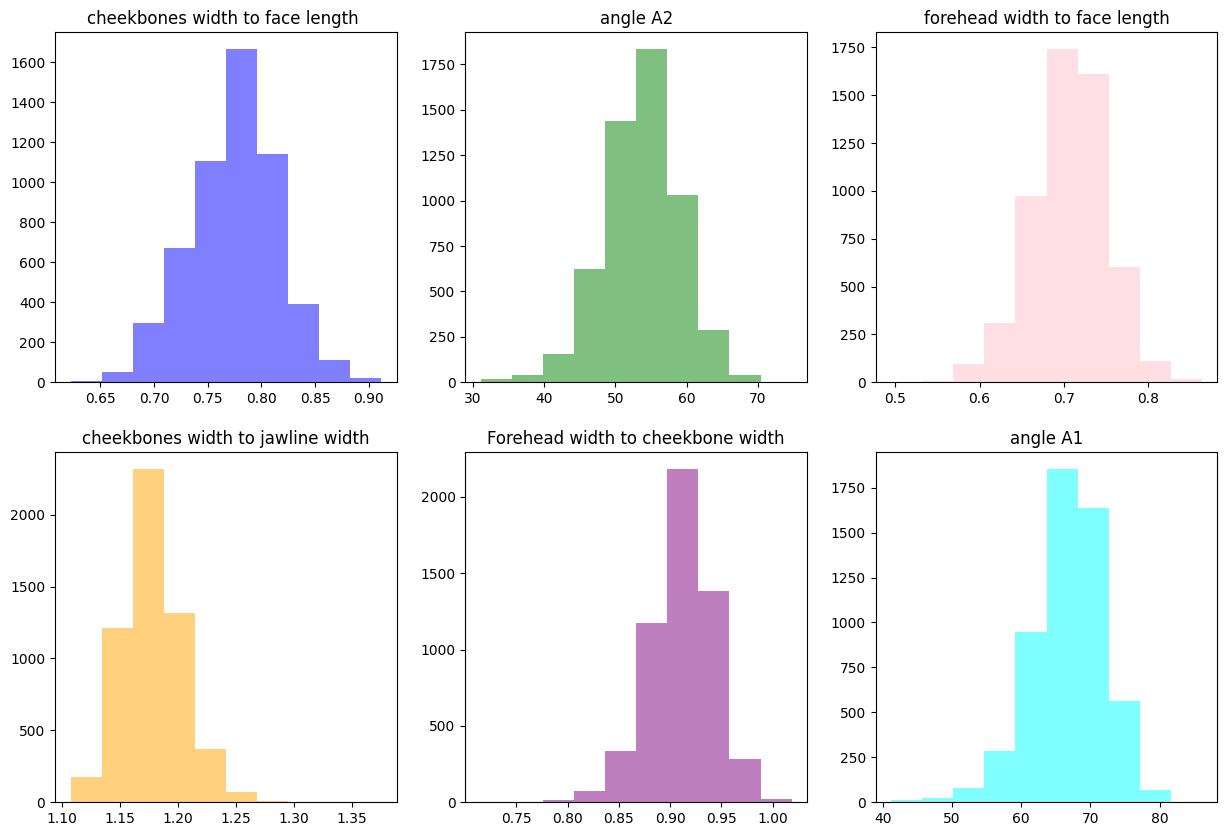

In [81]:
xclean = data.dropna(axis=0, how='any')
plt.figure(figsize=(15,10)) 

plt.subplot(2,3,1)
plt.hist(xclean['Ratio R2'], 10, facecolor='blue', alpha=0.5)
plt.title('cheekbones width to face length ')

plt.subplot(2,3,2)
plt.hist(xclean['angle A2'], 10, facecolor='green', alpha=0.5)
plt.title('angle A2')

plt.subplot(2,3,3)
plt.hist(xclean['Ratio R3'], 10, facecolor='pink', alpha=0.5)
plt.title('forehead width to face length')

plt.subplot(2,3,4)
plt.hist(xclean['Ratio R4'], 10, facecolor='orange', alpha=0.5)
plt.title('cheekbones width to jawline width')

plt.subplot(2,3,5)
plt.hist(xclean['Ratio R1'], 10, facecolor='purple', alpha=0.5)
plt.title('Forehead width to cheekbone width')

plt.subplot(2,3,6)
plt.hist(xclean['angle A1'], 10, facecolor='aqua', alpha=0.5)
plt.title('angle A1')

plt.show()

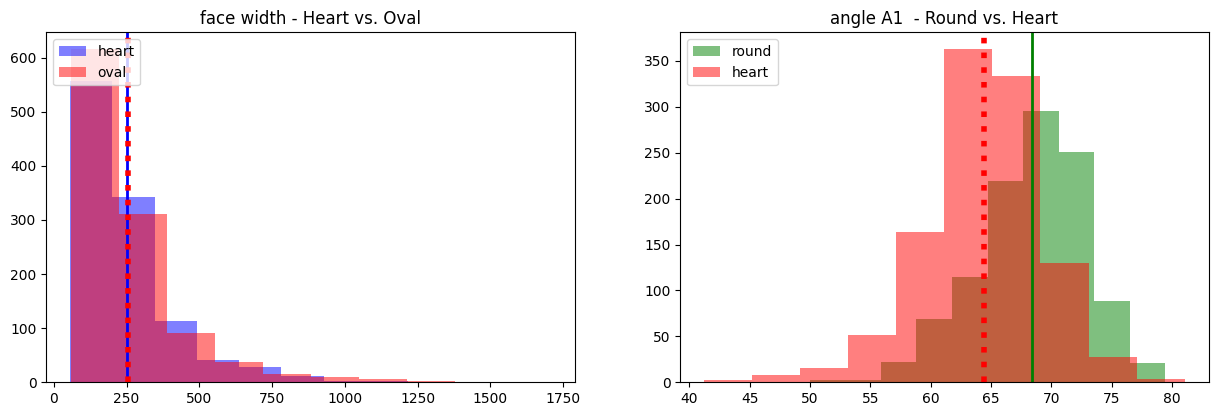

In [134]:
# Face width histograms; purposely normed because of varying sample sizes.

HW = xclean[xclean['Classes']=="heart"] 
OW = xclean[xclean['Classes']=="oval"] 
LW = xclean[xclean['Classes']=="oblong"] 
RW = xclean[xclean['Classes']=="round"] 
SW = xclean[xclean['Classes']=="square"] 
plt.figure(figsize=(15,10)) 

plt.subplot(2,2,1)
plt.hist(HW['cheekbone width D1'],label = 'heart',alpha = 0.5, color = 'b')
plt.hist(OW['cheekbone width D1'],label = 'oval',alpha = 0.5, color = 'r')
plt.axvline(HW['cheekbone width D1'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(OW['cheekbone width D1'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.title('face width - Heart vs. Oval')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.hist(RW['angle A1'],label = 'round',alpha = 0.5, color = 'g')
plt.hist(HW['angle A1'],label = 'heart',alpha = 0.5, color = 'r')
plt.axvline(RW['angle A1'].mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(HW['angle A1'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.legend(loc='upper left')
plt.title('angle A1  - Round vs. Heart')

plt.show()


In the first graph ,you can see how close the maens are for oval and heart shaped faces lenngth and their distruibutions overlap significantly,on the right hand,the angle A1 for round and heart faces are significantly different and the mean for heart is much higher 

### Evaluate models

#### Model comparisons

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Supervised Learning

In [137]:
# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=1200)

## use PCA for dimension reduction

In [138]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [139]:
X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [140]:
# used randomsearch to find these are the right parameters

mlp_best = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

mlp_best.fit(X_train_pca, Y_train)

MLPClassifier(hidden_layer_sizes=(60, 100, 30, 100), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')

In [141]:
print(mlp_best.score(X_train_pca,Y_train))
mlp_score = mlp_best.score(X_test_pca,Y_test)
print(mlp_score)

y_pred = mlp_best.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

0.6840438489646772
0.5310445580715851


col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,187,25,32,24,17,285
oblong,56,177,30,2,9,274
oval,95,24,62,43,37,261
round,33,5,28,149,70,285
square,27,6,23,56,152,264
All,398,237,175,274,285,1369


In [142]:
y_pred =mlp_best.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.47      0.66      0.55       285
      oblong       0.75      0.65      0.69       274
        oval       0.35      0.24      0.28       261
       round       0.54      0.52      0.53       285
      square       0.53      0.58      0.55       264

    accuracy                           0.53      1369
   macro avg       0.53      0.53      0.52      1369
weighted avg       0.53      0.53      0.52      1369



In [143]:
results_df = pd.DataFrame()

## KNN Classifier

In [144]:
# Get the RECALL for each shape and overall
correct_list =[]
shape_list = []
for i in mlp_crosstab.index[0:5]:
    correct = (mlp_crosstab.at[i,i]/mlp_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    shape_list.append(i)
    correct_list.append(correct)

shape_list.append('Overall')
correct_list.append(round(mlp_score,2)*100)

results_df['shape']= shape_list
results_df['MLP']=correct_list

In [145]:
# use the loop  below to fine tune the K hyperparameter
nn = []
score = []
cv_scores = []
neighbors = range(2,30)
for n in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n) 
    neigh.fit(X_train_pca, Y_train) 
    sc = neigh.score(X_test_pca,Y_test)
    scores = cross_val_score(neigh, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    nn.append(n)
    score.append(sc)

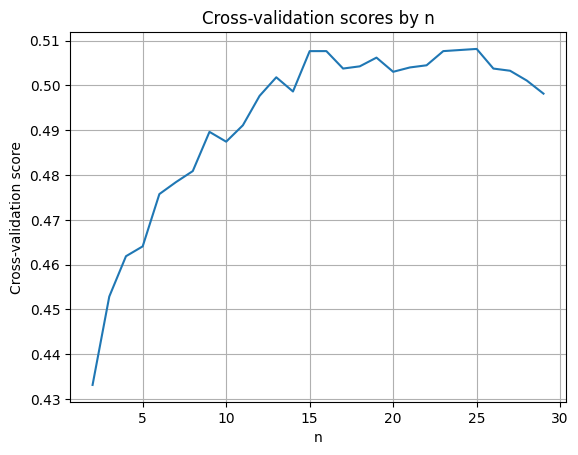

In [146]:
plt.plot(nn,cv_scores)
plt.title('Cross-validation scores by n')
plt.ylabel('Cross-validation score')
plt.xlabel('n')
plt.grid()
plt.show()

The optimal number of neighbors is 25


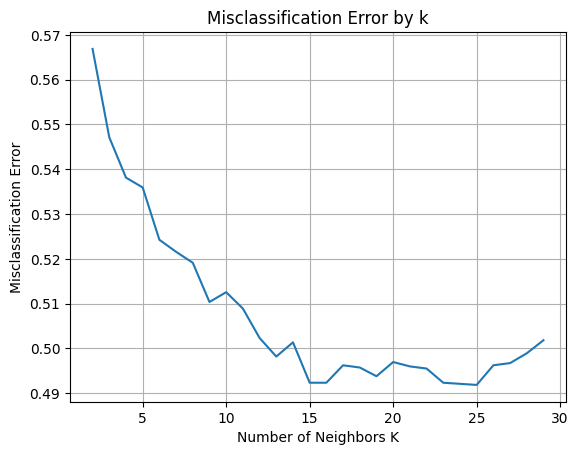

In [147]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.title('Misclassification Error by k')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.grid()
plt.show()

In [148]:
neigh = KNeighborsClassifier(n_neighbors=optimal_k) 
neigh.fit(X_train_pca, Y_train) 
print(neigh.score(X_train_pca,Y_train))
print(neigh.score(X_test_pca,Y_test))
y_pred = neigh.predict(X_test_pca)

KNN_crosstab = pd.crosstab(Y_test, y_pred,margins = True) 
KNN_crosstab

0.556394640682095
0.5208181154127101


col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,169,36,50,18,12,285
oblong,43,189,34,2,6,274
oval,84,37,83,30,27,261
round,40,7,41,141,56,285
square,24,10,36,63,131,264
All,360,279,244,254,232,1369


In [149]:
y_pred =neigh.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.47      0.59      0.52       285
      oblong       0.68      0.69      0.68       274
        oval       0.34      0.32      0.33       261
       round       0.56      0.49      0.52       285
      square       0.56      0.50      0.53       264

    accuracy                           0.52      1369
   macro avg       0.52      0.52      0.52      1369
weighted avg       0.52      0.52      0.52      1369



In [150]:
correct_list =[]
for i in KNN_crosstab.index[0:5]:
    correct = (KNN_crosstab.at[i,i]/KNN_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(neigh.score(X_test_pca,Y_test),2)*100)
results_df['KNN']=correct_list

### Random Forest Classifier

In [151]:
clf = RandomForestClassifier(max_depth=None, random_state=5,n_estimators=90,max_features='sqrt',
                            min_samples_leaf=5,min_samples_split=15,criterion='entropy', bootstrap=True)
clf.fit(X_train_pca, Y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=15,
                       n_estimators=90, random_state=5)

In [160]:
param_grid = { 
    'n_estimators': [50,150, 250,100, 500],
    'max_features': ['auto', 'sqrt', 'log2',None],
        'min_samples_leaf': [1,5,4,10,15,20,25],
        'min_samples_split': [2,5,4,10],
    'max_depth': [None,5,10,15,20,25],
    "criterion"         : ["gini", "entropy",None],
     "bootstrap": [True,False]
}

rf_random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv= 5, n_iter = 50)
rf_random_search.fit(X_train_pca, Y_train)
print(rf_random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=150, random_state=5)


In [161]:
rf_best = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
            max_depth=25, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)
rf_best.fit(X_train_pca, Y_train)
print(rf_best.score(X_train_pca,Y_train))
print(rf_best.score(X_test_pca,Y_test))

y_pred = rf_best.predict(X_test_pca)

rfc_crosstab = pd.crosstab(Y_test, y_pred,margins = True) 
rfc_crosstab





0.9929354445797808
0.6004382761139518


col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,167,38,45,21,14,285
oblong,32,216,19,2,5,274
oval,56,41,108,33,23,261
round,23,12,25,174,51,285
square,18,15,23,51,157,264
All,296,322,220,281,250,1369


In [162]:
y_pred =rf_best.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

       heart       0.56      0.59      0.57       285
      oblong       0.67      0.79      0.72       274
        oval       0.49      0.41      0.45       261
       round       0.62      0.61      0.61       285
      square       0.63      0.59      0.61       264

    accuracy                           0.60      1369
   macro avg       0.59      0.60      0.59      1369
weighted avg       0.60      0.60      0.60      1369



In [163]:
correct_list =[]
for i in rfc_crosstab.index[0:5]:
    correct = (rfc_crosstab.at[i,i]/rfc_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)


In [164]:
correct_list.append(round(rf_best.score(X_test_pca,Y_test),2)*100)
results_df['Random_Forest']=correct_list

### Gradient Boosting

In [165]:
gb_best = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, 
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
               random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
gb_best.fit(X_train_pca, Y_train)
print(gb_best.score(X_train_pca,Y_train))
print(gb_best.score(X_test_pca,Y_test))

1.0
0.581446311176041


In [166]:
predict_train = gb_best.predict(X_train_pca)
predict_test = gb_best.predict(X_test_pca)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

table_test

col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,154,35,61,24,11,285
oblong,19,222,24,2,7,274
oval,57,36,111,30,27,261
round,24,9,38,161,53,285
square,21,8,31,56,148,264
All,275,310,265,273,246,1369


In [167]:

y_pred =gb_best.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

       heart       0.56      0.54      0.55       285
      oblong       0.72      0.81      0.76       274
        oval       0.42      0.43      0.42       261
       round       0.59      0.56      0.58       285
      square       0.60      0.56      0.58       264

    accuracy                           0.58      1369
   macro avg       0.58      0.58      0.58      1369
weighted avg       0.58      0.58      0.58      1369



In [168]:
correct_list =[]
for i in table_test.index[0:5]:
    correct = (table_test.at[i,i]/table_test.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(gb_best.score(X_test_pca,Y_test),2)*100)

results_df['Gradient_Boosting']=correct_list

### Linear Discriminant Anlysis

In [169]:
# This runs quickly so can run each time if you want.

lda = LinearDiscriminantAnalysis()

param_grid = { 
    'n_components': [1,5,7,10],
    'solver': ['svd'],
    'tol':[0.001,0.01,0.1,0.5]
}
lda.fit(X_train_pca, Y_train)

lda_param_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv= 5)
lda_param_search.fit(X_train_pca, Y_train)
print(lda_param_search.best_estimator_)

LinearDiscriminantAnalysis(n_components=1, tol=0.01)


In [170]:
print(lda_param_search.score(X_train_pca, Y_train))
print(lda_param_search.score(X_test_pca, Y_test))

0.543727161997564
0.5259313367421475


In [171]:
param_grid2 = { 
    'n_components': [1,2,3,10,20],
    'solver': ['eigen','lsqr'],
    'shrinkage': ['auto',0.2,0.5,0.7,1]
}


lda_param_search2 = GridSearchCV(estimator=lda, param_grid=param_grid2, cv= 5)
lda_param_search2.fit(X_train_pca, Y_train)
print(lda_param_search2.best_estimator_)

LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='eigen')


In [172]:
print(lda_param_search2.score(X_train_pca, Y_train))
print(lda_param_search2.score(X_test_pca, Y_test))

0.5420219244823387
0.535427319211103


In [173]:
predict_test = lda_param_search.predict(X_test_pca)
table_test = pd.crosstab(Y_test, predict_test, margins=True)
table_test

col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,143,39,64,32,7,285
oblong,46,198,24,0,6,274
oval,66,44,80,34,37,261
round,24,10,35,163,53,285
square,16,8,33,71,136,264
All,295,299,236,300,239,1369


In [174]:

y_pred =lda_param_search.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.48      0.50      0.49       285
      oblong       0.66      0.72      0.69       274
        oval       0.34      0.31      0.32       261
       round       0.54      0.57      0.56       285
      square       0.57      0.52      0.54       264

    accuracy                           0.53      1369
   macro avg       0.52      0.52      0.52      1369
weighted avg       0.52      0.53      0.52      1369



In [175]:

y_pred =lda_param_search2.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

       heart       0.51      0.52      0.52       285
      oblong       0.66      0.76      0.71       274
        oval       0.33      0.27      0.30       261
       round       0.56      0.53      0.54       285
      square       0.55      0.59      0.57       264

    accuracy                           0.54      1369
   macro avg       0.52      0.53      0.53      1369
weighted avg       0.52      0.54      0.53      1369



In [176]:
correct_list =[]
for i in table_test.index[0:5]:
    correct = (table_test.at[i,i]/table_test.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(lda_param_search.score(X_test_pca,Y_test),2)*100)
results_df['LDA']=correct_list
results_df

,shape,MLP,KNN,Random_Forest,Gradient_Boosting,LDA
0,heart,66.0,59.0,59.0,54.0,50.0
1,oblong,65.0,69.0,79.0,81.0,72.0
2,oval,24.0,32.0,41.0,43.0,31.0
3,round,52.0,49.0,61.0,56.0,57.0
4,square,58.0,50.0,59.0,56.0,52.0
5,Overall,53.0,52.0,60.0,58.0,53.0


### Model comparison

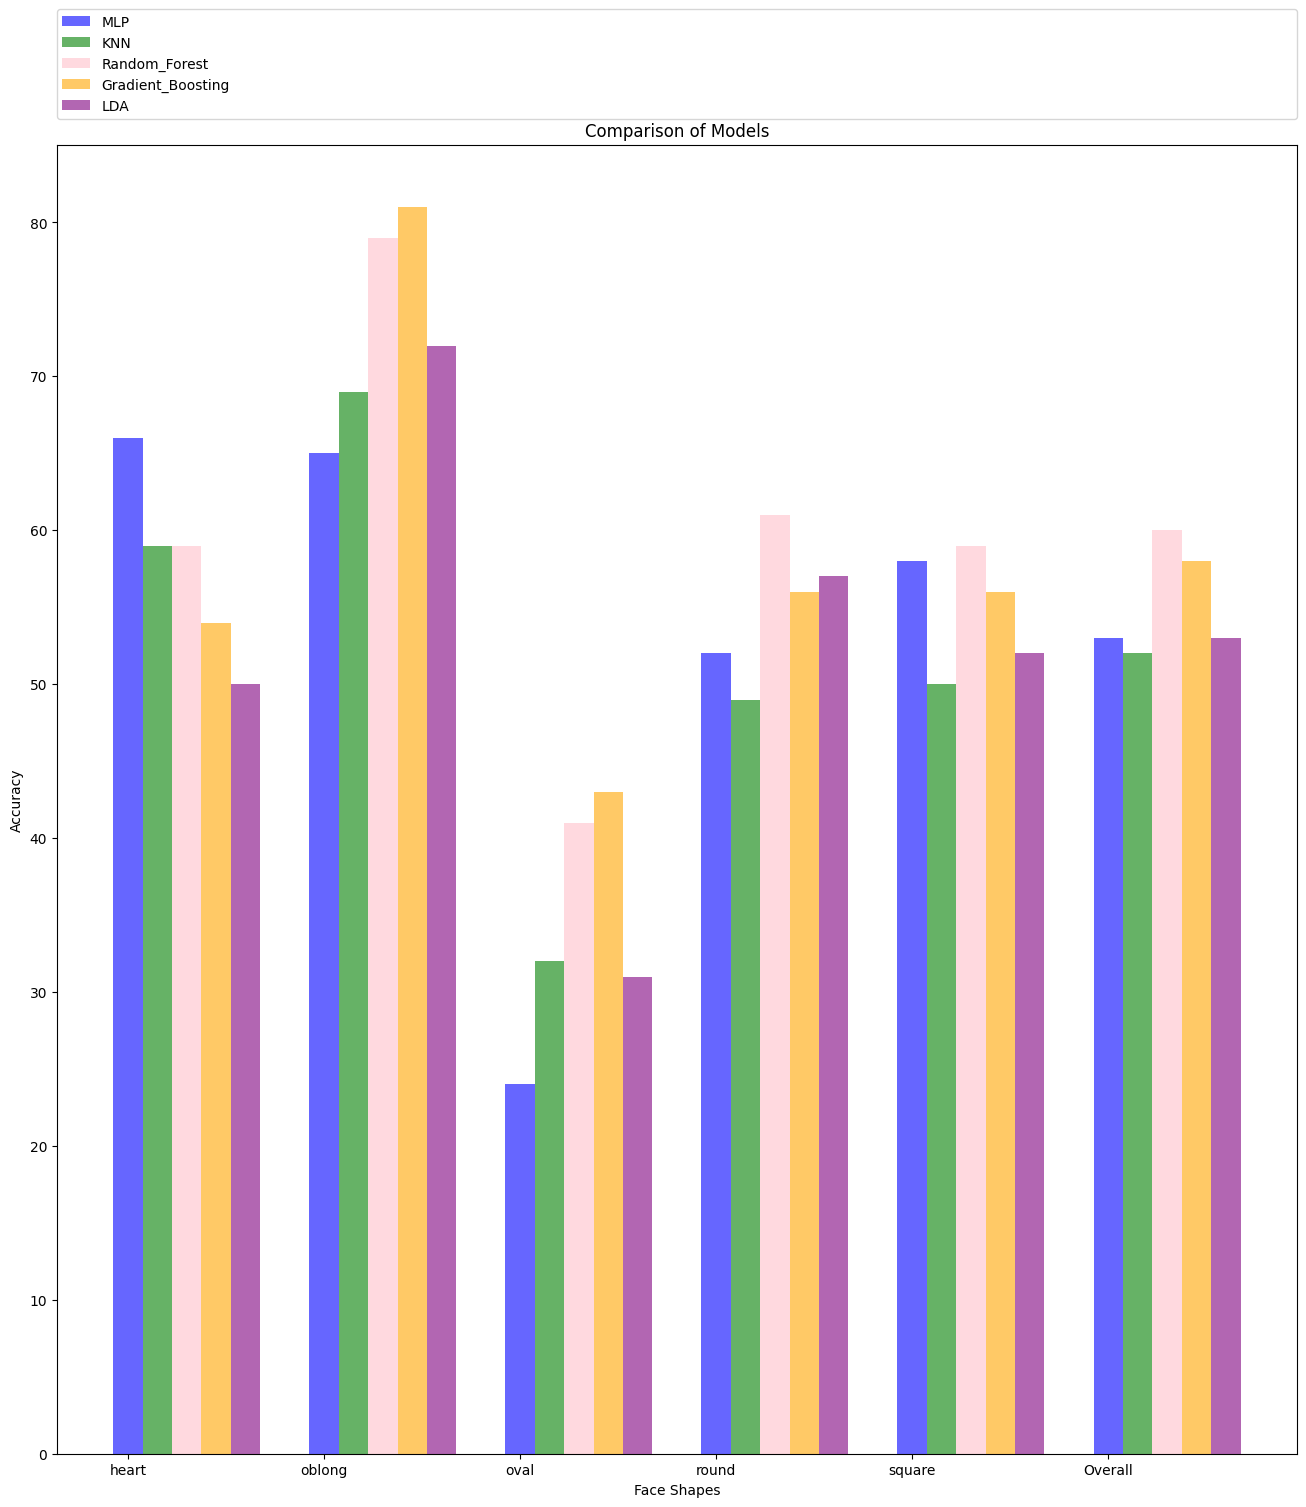

In [177]:
import matplotlib.pyplot as plt

def model_graph():
    ind = np.arange(6)  # the x locations for the groups
    width = 0.15       # the width of the bars

    fig, ax = plt.subplots(figsize=(16, 17))
    al = 0.6
    rects1 = ax.bar(ind, results_df['MLP'], width, color='blue',alpha= al,tick_label = results_df['shape'])
    rects2 = ax.bar(ind + width, results_df['KNN'], width, color='green',alpha= al)
    rects3 = ax.bar(ind + width*2, results_df['Random_Forest'], width, color='pink',alpha= al)
    rects4 = ax.bar(ind + width*3, results_df['Gradient_Boosting'], width, color='orange',alpha= al)
    rects5 = ax.bar(ind + width*4, results_df['LDA'], width, color='purple',alpha= al)

    plt.legend(results_df.iloc[0:0,1:7],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)


    plt.ylabel('Accuracy')
    plt.xlabel('Face Shapes')
    plt.title('Comparison of Models')
    plt.show()
    
model_graph()

In [178]:
results_df

,shape,MLP,KNN,Random_Forest,Gradient_Boosting,LDA
0,heart,66.0,59.0,59.0,54.0,50.0
1,oblong,65.0,69.0,79.0,81.0,72.0
2,oval,24.0,32.0,41.0,43.0,31.0
3,round,52.0,49.0,61.0,56.0,57.0
4,square,58.0,50.0,59.0,56.0,52.0
5,Overall,53.0,52.0,60.0,58.0,53.0


### ensemble learning

In [189]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import pandas as pd


# Define individual classifiers
mlp_best = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

rf_best = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
            max_depth=25, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)


gb_best = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, 
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
               random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best),('mlp',mlp_best)], voting='hard',n_jobs=-1)

# Fit the ensemble model
voting_clf.fit(X_train_pca, Y_train)

# Evaluate the ensemble model
print(voting_clf.score(X_train_pca, Y_train))
print(voting_clf.score(X_test_pca, Y_test))

y_pred = voting_clf.predict(X_test_pca)

crosstab = pd.crosstab(Y_test, y_pred, margins=True)
crosstab


0.9943970767356882
0.6048210372534697


col_0,heart,oblong,oval,round,square,All
Classes,,,,,,
heart,177,33,43,20,12,285
oblong,26,220,23,0,5,274
oval,69,35,101,27,29,261
round,26,9,31,167,52,285
square,25,8,26,42,163,264
All,323,305,224,256,261,1369


In [185]:
from sklearn.metrics import accuracy_score, classification_report
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.6055514974433893
Classification Report:
              precision    recall  f1-score   support

       heart       0.55      0.61      0.58       285
      oblong       0.72      0.81      0.76       274
        oval       0.46      0.41      0.43       261
       round       0.64      0.59      0.61       285
      square       0.63      0.61      0.62       264

    accuracy                           0.61      1369
   macro avg       0.60      0.60      0.60      1369
weighted avg       0.60      0.61      0.60      1369



### load the best model

In [187]:
import joblib

# Save the ensemble model
joblib.dump(voting_clf, 'ensemble_model.pkl')
voting_clf.model.save('fensemble model')

['ensemble_model.pkl']

# Run Example

This section is the implementation of the model itself on a new image. Select a photo and start the process below.